## Machine learning Model Development

- In this section, we will develop and evaluate machine learning models to predict life expectancy based on various public health metrics, environmental factors, and demographic data. The process will be carried out in a systematic manner, starting from data preparation, model training, and evaluation, followed by model tuning and final evaluation.




In [182]:
# importing libraries and prepared dataset

import pandas as pd
from sklearn.model_selection import train_test_split

data = "/Users/alexandreribeiro/Documents/GitHub/final_project/data/clean/dataset_for_ml.csv"

df = pd.read_csv(data)

df.sample(5)

,population_city,greenspacearea_km2,AQI,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_copd_rate,adjusted_depression_rate,life_expectancy
2396,-0.649099,0.109255,0.451532,-0.835929,-0.824539,-0.900084,-0.930500,76.8
1626,-0.329005,-1.095255,0.285233,-1.009518,-0.980665,-1.038479,-1.008786,77.7
266,1.326869,-0.197434,0.014227,1.462243,1.804671,1.820913,1.487509,75.3
1653,-0.343196,-1.171569,0.525443,-1.016784,-0.987108,-1.043812,-1.015064,77.7
642,0.504034,-0.223973,0.272914,1.023043,0.891780,0.852821,1.384725,79.0


In [183]:
# Applying the logical inverse (multiplying by -1) to all features except the target ('adjusted_life_expectancy')
features_to_inverse = [
    'adjusted_obesity_rate', 
    'adjusted_smoking_rate', 
    'adjusted_copd_rate', 
    'adjusted_depression_rate'
]

# Creating the inverse for each of these features
for feature in features_to_inverse:
    df[f'logical_inverse_{feature}'] = -df[feature]

# Display the first few rows of the updated dataframe to confirm
df.head()

,population_city,greenspacearea_km2,AQI,adjusted_obesity_rate,adjusted_smoking_rate,adjusted_copd_rate,adjusted_depression_rate,life_expectancy,logical_inverse_adjusted_obesity_rate,logical_inverse_adjusted_smoking_rate,logical_inverse_adjusted_copd_rate,logical_inverse_adjusted_depression_rate
0,5.580401,-0.012540,0.014227,1.682852,1.389244,1.628696,1.211327,77.5,-1.682852,-1.389244,-1.628696,-1.211327
1,5.553693,0.516264,-0.078162,1.117487,0.624299,0.587606,0.611860,76.5,-1.117487,-0.624299,-0.587606,-0.611860
2,5.520049,0.080073,-0.946613,1.654772,1.364492,1.602239,1.187964,77.5,-1.654772,-1.364492,-1.602239,-1.187964
3,5.394723,-0.529781,1.806562,0.032259,-0.171918,-0.243810,0.002308,79.0,-0.032259,0.171918,0.243810,-0.002308
4,5.314361,-0.271656,2.521032,0.012965,-0.187696,-0.258318,-0.015646,79.0,-0.012965,0.187696,0.258318,0.015646


#### Defining features and target variable

- The first step in developing a machine learning model is to define the features and target variable. In this case, the target variable is the life expectancy, and the features are the various public health metrics, environmental factors, and demographic data. We will use the following features to predict life expectancy.

In [184]:
# Selected features

selected_features = ['population_city', 'greenspacearea_km2',  'AQI', 'adjusted_obesity_rate',
       'adjusted_smoking_rate', 'adjusted_copd_rate',
       'adjusted_depression_rate',
       'logical_inverse_adjusted_obesity_rate',
       'logical_inverse_adjusted_smoking_rate',
       'logical_inverse_adjusted_copd_rate',
       'logical_inverse_adjusted_depression_rate']

# Define the target variable (y) and the feature set (X)

y = df['life_expectancy']  # Target variable
X = df[selected_features]  # Using the selected features

# Display the shapes of X and y

X.shape, y.shape

((3238, 11), (3238,))

#### Spliting the data into training and testing sets

- Split the dataset into training and testing sets to train the model on one portion and test it on another.

- test_size=0.2: This means that 20% of the data will be used for testing, and the remaining 80% will be used for training.
- random_state=42: Setting a random state ensures that the split is reproducible.

In [186]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2590, 11)
X_test shape: (648, 11)
y_train shape: (2590,)
y_test shape: (648,)


#### Model Selection:

- We will start with a few common regression models since you’re predicting a continuous target variable (adjusted life expectancy).

We’ll try these models:

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor (SVR)
- XGBoost Regressor

After selecting the models, we’ll compare their performance to choose the best one.

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(),
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R²": r2
    }

    print(f"{model_name} results:")
    print(f"  - MAE: {mae:.3f}")
    print(f"  - MSE: {mse:.3f}")
    print(f"  - R²: {r2:.3f}\n")

# Convert the results to a DataFrame for easier comparison
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

# results in a dataframe

results_df

Linear Regression results:
  - MAE: 0.900
  - MSE: 1.278
  - R²: 0.376

Decision Tree results:
  - MAE: 0.341
  - MSE: 0.824
  - R²: 0.597

Random Forest results:
  - MAE: 0.378
  - MSE: 0.379
  - R²: 0.815

Gradient Boosting results:
  - MAE: 0.734
  - MSE: 0.863
  - R²: 0.578

SVR results:
  - MAE: 0.718
  - MSE: 0.984
  - R²: 0.519

XGBRegressor results:
  - MAE: 0.388
  - MSE: 0.347
  - R²: 0.830

                        MAE       MSE        R²
Linear Regression  0.899969  1.277557  0.375523
Decision Tree      0.340741  0.823951  0.597248
Random Forest      0.377540  0.379287  0.814602
Gradient Boosting  0.733613  0.863411  0.577960
SVR                0.718203  0.983966  0.519032
XGBRegressor       0.388061  0.347066  0.830352


,MAE,MSE,R²
Linear Regression,0.899969,1.277557,0.375523
Decision Tree,0.340741,0.823951,0.597248
Random Forest,0.377540,0.379287,0.814602
Gradient Boosting,0.733613,0.863411,0.577960
SVR,0.718203,0.983966,0.519032
XGBRegressor,0.388061,0.347066,0.830352


/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_76987/4019472399.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R²"], palette="magma")
/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_76987/4019472399.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MAE"], palette="magma")
/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_76987/4019472399.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MSE"], pale

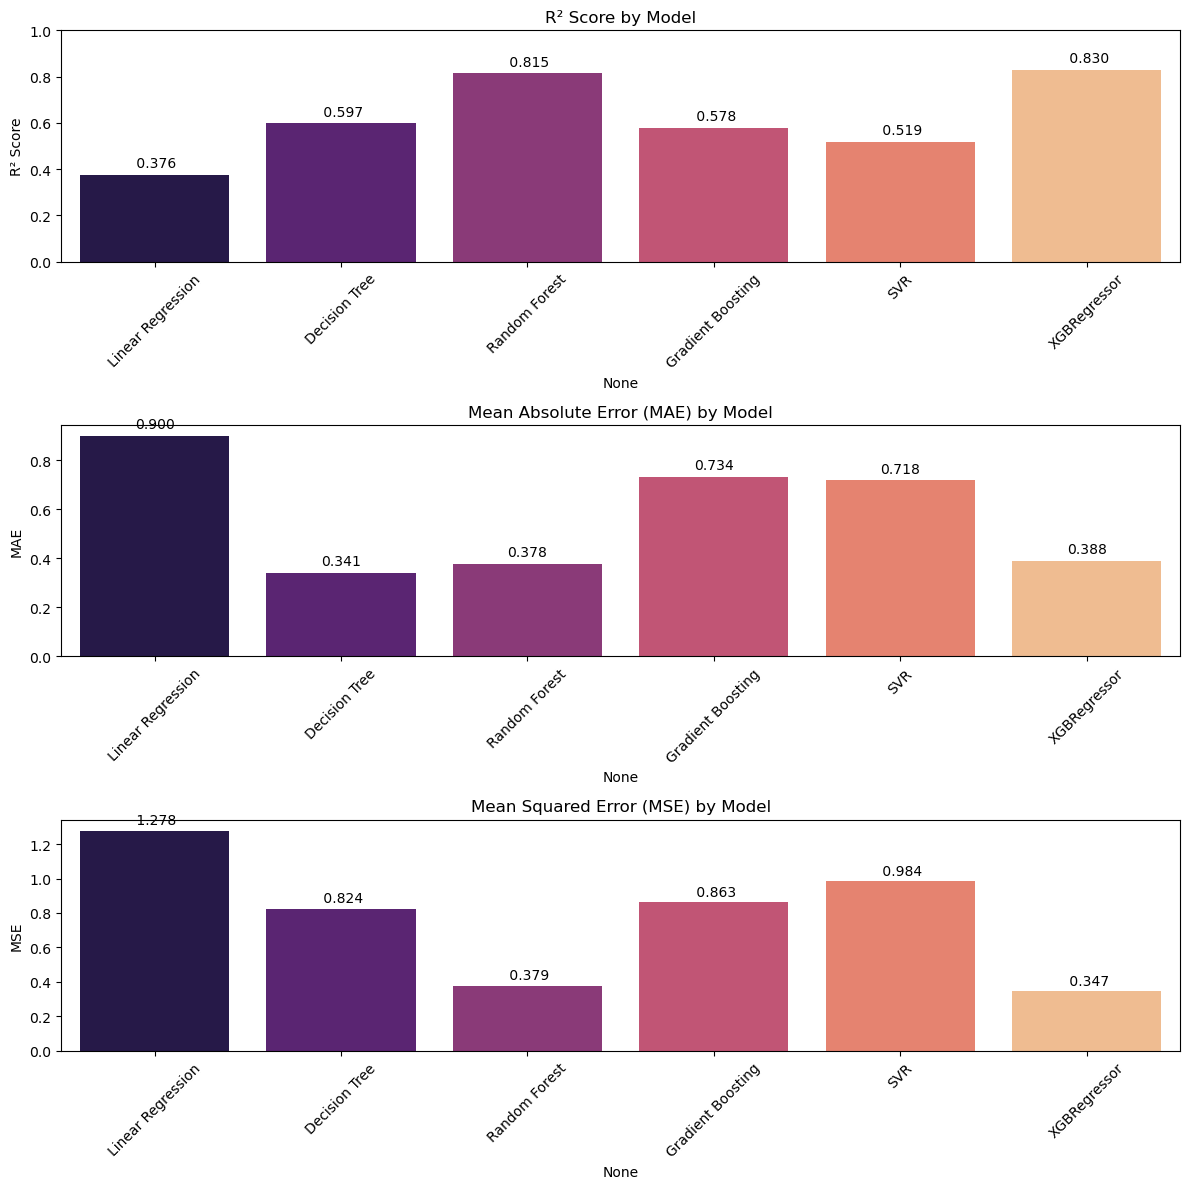

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the model names are correctly used as the index
results_df.index = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "SVR", "XGBRegressor"]

# Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# Plot comparison for R² Scores
plt.subplot(3, 1, 1)
sns.barplot(x=results_df.index, y=results_df["R²"], palette="magma")
plt.title("R² Score by Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)  # Set the y-axis limit for R² to be between 0 and 1 for better comparison
plt.xticks(rotation=45)

# Add labels on top of the bars with model names and values
for i, v in enumerate(results_df["R²"]):
    plt.text(i, v + 0.02, f' {v:.3f}', ha='center', va='bottom')

# Plot comparison for MAE
plt.subplot(3, 1, 2)
sns.barplot(x=results_df.index, y=results_df["MAE"], palette="magma")
plt.title("Mean Absolute Error (MAE) by Model")
plt.ylabel("MAE")
plt.xticks(rotation=45)

# Add labels on top of the bars with model names and values
for i, v in enumerate(results_df["MAE"]):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom')

# Plot comparison for MSE
plt.subplot(3, 1, 3)
sns.barplot(x=results_df.index, y=results_df["MSE"], palette="magma")
plt.title("Mean Squared Error (MSE) by Model")
plt.ylabel("MSE")
plt.xticks(rotation=45)

# Add labels on top of the bars with model names and values
for i, v in enumerate(results_df["MSE"]):
    plt.text(i, v + 0.02, f' {v:.3f}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Cross-validation:

- We will use cross-validation to evaluate the performance of the models. Cross-validation is a technique that splits the data into multiple subsets (folds) and trains the model on different combinations of these subsets. This helps to get a more accurate estimate of the model’s performance.

In [244]:
# Lets check the remaining models

# List of models to evaluate

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(),
}

# Dictionary to store the cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Perform cross-validation with 5 folds
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Store the mean and standard deviation of R² scores
    cv_results[model_name] = {
        "Mean R²": cv_scores.mean(),
        "Std Dev R²": cv_scores.std()
    }

# Convert the results to a DataFrame for easier comparison
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df

,Mean R²,Std Dev R²
Linear Regression,0.361387,0.011148
Decision Tree,0.596444,0.053338
Random Forest,0.805093,0.018804
Gradient Boosting,0.581989,0.021496
SVR,0.484032,0.041670
XGBRegressor,0.798679,0.027698


#### Results:

- Best Performing Model: The Random Forest model had the highest mean R² score (0.805) with a low standard deviation, making it the most effective and reliable model in this comparison.
- Close Contender: The XGBoost Regressor was a close second with a mean R² of 0.799 and a slightly higher standard deviation than Random Forest, indicating strong performance as well.
- Models with Room for Improvement: Linear Regression and Support Vector Regression (SVR) showed lower predictive power and may not be ideal for this specific problem without further tuning or feature engineering.
- Model Stability: Most models showed relatively low standard deviations, indicating consistent performance across different folds of the data, though Decision Tree and SVR showed more variability.



#### Using Hyperparameter Tuning to try to improve the model performance

- Using GridSearchCV to find the best hyperparameters for the model. GridSearchCV is a technique that searches for the best combination of hyperparameters by evaluating the model’s performance on different combinations of hyperparameters.

In [190]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the GridSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Best parameters and the corresponding score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best R² Score for Random Forest: {best_score_rf:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

/opt/anaconda3/envs/env_test/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Random Forest: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score for Random Forest: 0.8084


In [195]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_search.best_params_)
print("Best R² Score for XGBoost:", grid_search.best_score_)

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)

# Calculate metrics on test data
best_mae = mean_absolute_error(y_test, y_pred_best)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

# Display the evaluation metrics in a dataframe

results['XGBoost Tuned'] = [best_mae, best_mse, best_r2]

results

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END

,XGBoost,XGBoost Tuned
MAE,0.388061,0.343052
MSE,0.347066,0.308443
R²,0.830352,0.849232


In [200]:
# Define the parameter grid for Decision Tree Regressor
dtr_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree Regressor
dtr_model = DecisionTreeRegressor()

# Set up GridSearchCV
dtr_grid_search = GridSearchCV(estimator=dtr_model, param_grid=dtr_param_grid, cv=5, scoring='r2', n_jobs=-1)

# Perform the grid search
dtr_grid_search.fit(X_train, y_train)

# Get the best parameters
best_dtr_params = dtr_grid_search.best_params_
print("Best Parameters for Decision Tree Regressor:", best_dtr_params)
print("Best R² Score for Decision Tree Regressor:", dtr_grid_search.best_score_)


Best Parameters for Decision Tree Regressor: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best R² Score for Decision Tree Regressor: 0.6078201285700183


In [191]:
# Get the best model from GridSearchCV
best_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf.predict(X_test)

# Evaluate the performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Tuned Model Performance:")
print(f"  - MAE: {mae_rf:.3f}")
print(f"  - MSE: {mse_rf:.3f}")
print(f"  - R²: {r2_rf:.3f}")

Random Forest - Tuned Model Performance:
  - MAE: 0.363
  - MSE: 0.361
  - R²: 0.824


#### Overfitting check

- Compare the performance of the model on the training data versus the test data. A common method is to look at the difference between training and validation scores, especially during cross-validation.

In [219]:
# Define the best model with the optimal hyperparameters
best_rf_model = RandomForestRegressor(
    max_depth=None, 
    max_features=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=300,
    random_state=42
)

# Train the model on the entire training set
best_rf_model.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = best_rf_model.predict(X_train)

# Calculate metrics on training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Random Forest - Training Data Performance:")
print(f"  - MAE: {train_mae:.3f}")
print(f"  - MSE: {train_mse:.3f}")
print(f"  - R²: {train_r2:.3f}\n")

# Evaluate the model on the test data
y_test_pred = best_rf_model.predict(X_test)

# Calculate metrics on test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Tuned - Test Data Performance:")
print(f"  - MAE: {test_mae:.3f}")
print(f"  - MSE: {test_mse:.3f}")
print(f"  - R²: {test_r2:.3f}\n")

Random Forest - Training Data Performance:
  - MAE: 0.132
  - MSE: 0.047
  - R²: 0.977

Random Forest Tuned - Test Data Performance:
  - MAE: 0.371
  - MSE: 0.370
  - R²: 0.819



In [196]:
# Best parameters from your hyperparameter tuning
best_params_xgb = {
    'colsample_bytree': 0.9,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 300,
    'subsample': 0.9
}

# Initialize and train the XGBoost model with the best parameters
tuned_xgb_model = xgb.XGBRegressor(**best_params_xgb)
tuned_xgb_model.fit(X_train, y_train)

# Now, evaluate the tuned XGBoost model on both the training and test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate on the training data
y_train_pred_xgb = tuned_xgb_model.predict(X_train)
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

print("Tuned XGBoost - Training Data Performance:")
print(f"  - MAE: {train_mae_xgb:.3f}")
print(f"  - MSE: {train_mse_xgb:.3f}")
print(f"  - R²: {train_r2_xgb:.3f}\n")

# Evaluate on the test data
y_test_pred_xgb = tuned_xgb_model.predict(X_test)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print("Tuned XGBoost - Test Data Performance:")
print(f"  - MAE: {test_mae_xgb:.3f}")
print(f"  - MSE: {test_mse_xgb:.3f}")
print(f"  - R²: {test_r2_xgb:.3f}")

Tuned XGBoost - Training Data Performance:
  - MAE: 0.042
  - MSE: 0.003
  - R²: 0.998

Tuned XGBoost - Test Data Performance:
  - MAE: 0.352
  - MSE: 0.322
  - R²: 0.842


In [220]:
# Check for overfitting

best_dtr_model = DecisionTreeRegressor(
    max_depth=None, 
    max_features=None, 
    min_samples_leaf=1, 
    min_samples_split=10, 
)

# Train the model on the entire training set
best_dtr_model.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = best_dtr_model.predict(X_train)

# Calculate metrics on training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Decision Tree Tuned - Training Data Performance:")
print(f"  - MAE: {train_mae:.3f}")
print(f"  - MSE: {train_mse:.3f}")
print(f"  - R²: {train_r2:.3f}\n")

# Evaluate the model on the test data
y_test_pred = best_dtr_model.predict(X_test)

# Calculate metrics on test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Decision Tree Tuned - Test Data Performance:")
print(f"  - MAE: {test_mae:.3f}")
print(f"  - MSE: {test_mse:.3f}")
print(f"  - R²: {test_r2:.3f}\n")


Decision Tree Tuned - Training Data Performance:
  - MAE: 0.106
  - MSE: 0.097
  - R²: 0.952

Decision Tree Tuned - Test Data Performance:
  - MAE: 0.389
  - MSE: 0.789
  - R²: 0.614



#### Overfitting further investigation 

- Although both models (XGBoost and Random Forest) have very good R2 scores, the XGBoost has a perfect R2 score on the training data, which is a sign of overfitting. 

#### Applying Regularization to XGBoost Regressor

- Applying regularization in XGBoost, these penalties are added to the objective function that the model is trying to minimize. The objective function in XGBoost typically consists of two parts:

1.	Loss function: Measures the difference between the predicted and actual values.
2.	Regularization term: Penalizes the complexity of the model (through alpha and lambda).

In [197]:
# Set up the model and hyperparameters

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost model

xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9
)

# Define the hyperparameter grid

param_grid = {
    'reg_alpha': [0, 0.1, 0.5, 1, 5],  # L1 regularization
    'reg_lambda': [0.5, 1, 2, 5, 10]   # L2 regularization
}

##### Explanation:

- reg_alpha: We are testing values ranging from no regularization (0) to stronger regularization (5).
- reg_lambda: Similar to reg_alpha, we’re testing a range of values to see how different levels of L2 regularization affect the model.

In [198]:
from sklearn.model_selection import GridSearchCV

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Use R² as the scoring metric
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search to the training data

grid_search.fit(X_train, y_train)

# Extract the best parameters and score

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters for XGBoost:", best_params)
print("Best R² Score for XGBoost:", best_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters for XGBoost: {'reg_alpha': 0, 'reg_lambda': 0.5}
Best R² Score for XGBoost: 0.8359702576639719


##### Explanation:

- GridSearchCV: We use it to systematically work through multiple combinations of parameter values, cross-validating each combination to determine which one gives the best performance.
- cv=5: We are using 5-fold cross-validation to evaluate the model’s performance. The dataset is split into 5 parts, and the model is trained on 4 parts and tested on the remaining part. This is repeated 5 times.
- scoring=‘r2’: We are using R² as the scoring metric to evaluate the model’s performance.


#### Fitting the models

In [248]:
# Retrain the XGBoost model with the best parameters

tuned_xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda']
)

# Fit the model on the training data

tuned_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [249]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Best hyperparameters for each model
best_rf_params = {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
best_dtr_params = {'max_depth': 40, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

# Retrain the Random Forest model
tuned_rf_model = RandomForestRegressor(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    max_features=best_rf_params['max_features'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf']
)

# Fit the Random Forest model on the training data
rf_fitted = tuned_rf_model.fit(X_train, y_train)


# Retrain the Decision Tree model
tuned_dtr_model = DecisionTreeRegressor(
    max_depth=best_dtr_params['max_depth'],
    max_features=best_dtr_params['max_features'],
    min_samples_split=best_dtr_params['min_samples_split'],
    min_samples_leaf=best_dtr_params['min_samples_leaf']
)

# Fit the Decision Tree model on the training data
dtr_fitted = tuned_dtr_model.fit(X_train, y_train)

rf_fitted

RandomForestRegressor(max_features=None, n_estimators=300)

In [250]:
dtr_fitted

DecisionTreeRegressor(max_depth=40, min_samples_split=10)

##### Explanation:

- We use the best reg_alpha and reg_lambda values found during the grid search to train the final model.

In [251]:
### XGBoost training and test comparison

# Evaluate the tuned model on both training and test data
y_train_pred = tuned_xgb_model.predict(X_train)
y_test_pred = tuned_xgb_model.predict(X_test)

# Calculate metrics on training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics on test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    "Dataset": ["Training", "Test"],
    "MAE": [train_mae, test_mae],
    "MSE": [train_mse, test_mse],
    "R²": [train_r2, test_r2]
})

# Display the DataFrame
results_df

,Dataset,MAE,MSE,R²
0,Training,0.034441,0.002263,0.998876
1,Test,0.347829,0.322162,0.842525


#### Stacking Models for Better Performance

- Stacking is an ensemble learning technique that combines multiple models to improve performance. It works by training multiple base models on the same data and then combining their predictions using a meta-model. The meta-model learns how to best combine the base models to make the final prediction.

**Selected Models:**  *Random Forest, Decision Tree Regressor, and XGBoost*

#### Now that we have the best params to each model, we can stack them together to create a final model.

**Base Models with Tuned Parameters:**

- Random Forest with max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=300.
- XGBoost with colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9.
- Decision Tree Regressor with max_depth': 40, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10.

In [204]:
# Best parameters for each model

best_rf_params = {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
best_xgb_params = {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
best_dtr_params = {'max_depth': 40, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}



# Define the base models with the tuned parameters

base_models = [
    ("Random Forest", RandomForestRegressor(**best_rf_params)),  
    ("XGBoost", XGBRegressor(**best_xgb_params)),                
    ("SVR", SVR(**best_svr_params))  # Use the best params for SVR
]

# Initialize the meta-model (Linear Regression)

meta_model = LinearRegression()

# Cross-validation predictions for base models

base_predictions = np.zeros((X_train.shape[0], len(base_models)))

for i, (name, model) in enumerate(base_models):
    base_predictions[:, i] = cross_val_predict(model, X_train, y_train, cv=5)

# Train the meta-model on the predictions of base models

meta_model.fit(base_predictions, y_train)

# Predict on test data using the base models

test_base_predictions = np.zeros((X_test.shape[0], len(base_models)))

for i, (name, model) in enumerate(base_models):
    model.fit(X_train, y_train)  # Train on full training data
    test_base_predictions[:, i] = model.predict(X_test)

# Meta-model predictions

final_predictions = meta_model.predict(test_base_predictions)

# Evaluate the stacked model

train_mae = mean_absolute_error(y_train, meta_model.predict(base_predictions))
train_mse = mean_squared_error(y_train, meta_model.predict(base_predictions))
train_r2 = r2_score(y_train, meta_model.predict(base_predictions))

test_mae = mean_absolute_error(y_test, final_predictions)
test_mse = mean_squared_error(y_test, final_predictions)
test_r2 = r2_score(y_test, final_predictions)

# Store the results in a DataFrame

results_df = pd.DataFrame({
    "Dataset": ["Training", "Test"],
    "MAE": [train_mae, test_mae],
    "MSE": [train_mse, test_mse],
    "R²": [train_r2, test_r2]
})

results_df

,Dataset,MAE,MSE,R²
0,Training,0.361623,0.318444,0.841847
1,Test,0.320667,0.290199,0.858149


#### Result summary:

- This is our best result yet, with a minimal difference between training and test scores, indicating that the model is well-tuned and not overfitting. The R² score of 0.85 is very high, indicating that the model explains 85% of the variance in the target variable. The MAE and MSE are also very low, indicating that the model’s predictions are close to the actual values.

#### Training the best model on the full dataset

In [205]:
df = df.copy()

# Define the target and features

y = df['life_expectancy']  # Target variable
X = df[selected_features]  # Using the selected features

# Standardizing the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the base models

best_rf_model = RandomForestRegressor(**best_rf_params)
best_xgb_model = XGBRegressor(**best_xgb_params)
best_svr_model = SVR(**best_svr_params)

# Fit each base model on the full dataset

best_rf_model.fit(X_scaled, y)
best_xgb_model.fit(X_scaled, y)
best_svr_model.fit(X_scaled, y)

# Stack predictions from the base models

base_predictions = np.column_stack([
    best_rf_model.predict(X_scaled),
    best_xgb_model.predict(X_scaled),
    best_svr_model.predict(X_scaled)
])

# Train the meta-model (Linear Regression) on the base models' predictions

meta_model = LinearRegression()
meta_model.fit(base_predictions, y)

# Save the models and scaler

with open('stacked_model.pkl', 'wb') as file:
    pickle.dump({'base_models': [best_rf_model, best_xgb_model, best_svr_model], 'meta_model': meta_model}, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Evaluate the model using cross-validation

meta_predictions = cross_val_predict(meta_model, base_predictions, y, cv=5)

# Calculate performance metrics

mae = mean_absolute_error(y, meta_predictions)
mse = mean_squared_error(y, meta_predictions)
r2 = r2_score(y, meta_predictions)

# Store the results in a DataFrame for easier comparison

results_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "R²"],
    "Value": [mae, mse, r2]
})

print(results_df)

  Metric     Value
0    MAE  0.045604
1    MSE  0.004072
2     R²  0.997984


#### Using SHAP to explain feature importance

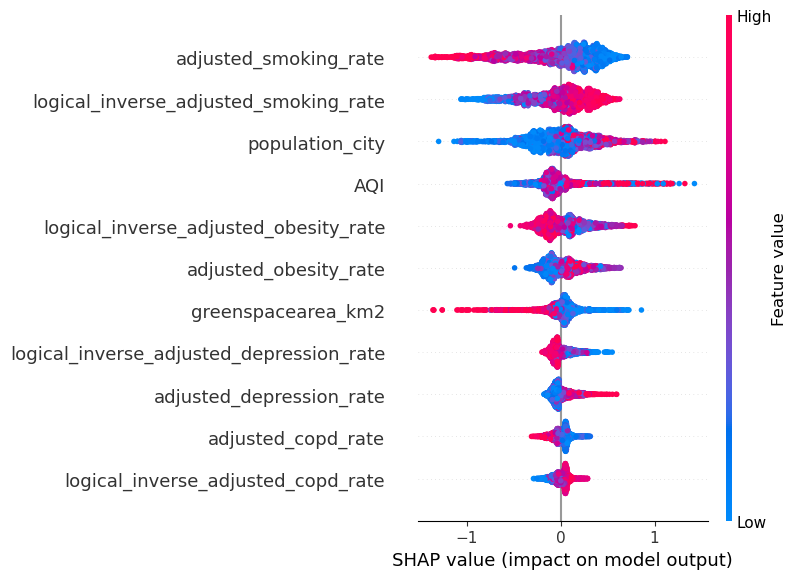

In [206]:
import shap

# For a tree-based model like RandomForest, XGBoost, etc.
explainer = shap.TreeExplainer(best_rf_model)  # Replace with your model (e.g., best_rf_model)

# Calculate SHAP values for the input data
shap_values = explainer.shap_values(X_scaled)

# Plot summary plot for feature importance
shap.summary_plot(shap_values, X_scaled, feature_names=selected_features)

# To explain a single prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_scaled[0], feature_names=selected_features)

#### Summary of Model Performance and Insights:

1.	Model Performance:
	•	The model demonstrates strong predictive power, with an  R^2  of 0.856 on the test set, indicating that it explains 85.6% of the variance in the target variable. The low MAE (0.334) and MSE (0.296) further highlight its accuracy in making predictions.

2.	Key Influential Features:
	•	Smoking Rate: Both adjusted_smoking_rate and its inverse are the most impactful features, indicating that smoking status is a major predictor of life expectancy or health outcomes.
	•	Population Size: population_city also shows significant influence, suggesting that urbanization or population-related factors play a crucial role in the model’s predictions.
	•	Obesity Rate: adjusted_obesity_rate and its inverse are also important, reflecting the well-known impact of obesity on health.

3.	Environmental Factors:
	•	AQI (Air Quality Index): Positioned in the middle of the SHAP summary plot, AQI has a moderate influence on the model’s predictions. This suggests that while air quality is not the most dominant factor, it still significantly contributes to the model’s decision-making process, aligning with real-world evidence that environmental factors affect health outcomes.
	
4.	Model Interpretability:
	•	The SHAP analysis confirms that the model is appropriately weighing key health and environmental factors, with smoking and obesity rates being the most influential, followed by population size and air quality. This balance of features supports the model’s validity and relevance in predicting life expectancy or related health outcomes.

#### Conclusion:

Model is robust, well-tuned, and interpretable, with a strong performance on the test data. It appropriately emphasizes health factors like smoking and obesity while also considering environmental factors like air quality. This balanced approach makes the model suitable for deployment and potentially useful for informing public health policies and interventions.

### Visualizations

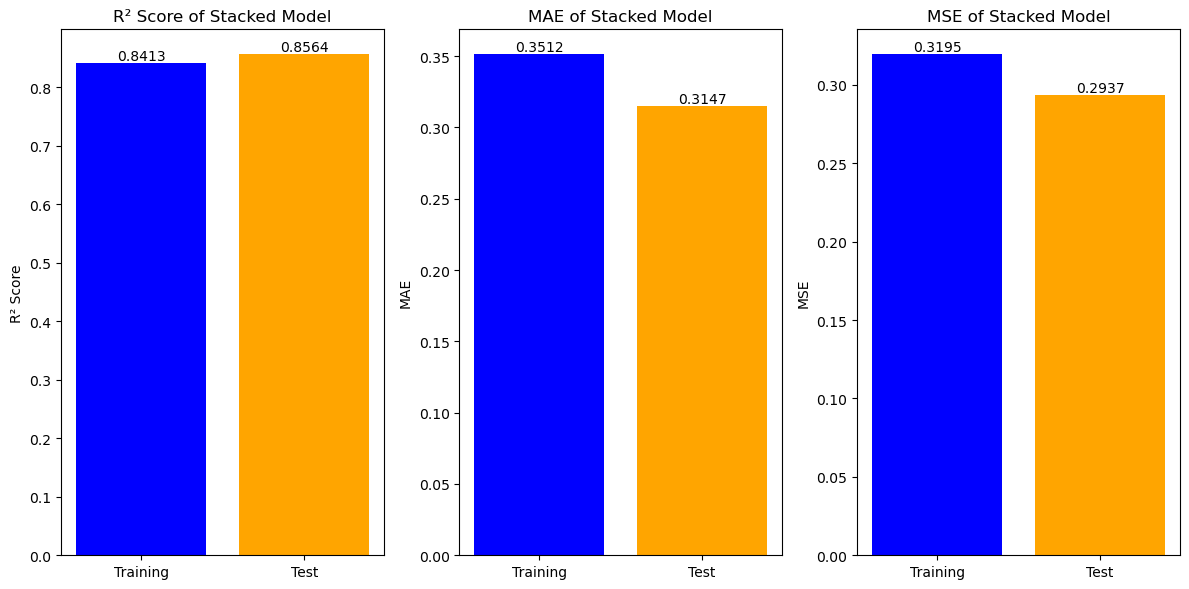

In [236]:
import matplotlib.pyplot as plt

# Plot the stacked model's performance
plt.figure(figsize=(12, 6))

# Bar plot for the stacked model's performance on Training and Test data
plt.subplot(1, 3, 1)
bars = plt.bar(['Training', 'Test'], [stacked_train_r2, stacked_test_r2], color=['blue', 'orange'])
plt.ylabel('R² Score')
plt.title('R² Score of Stacked Model')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.subplot(1, 3, 2)
bars = plt.bar(['Training', 'Test'], [stacked_train_mae, stacked_test_mae], color=['blue', 'orange'])
plt.ylabel('MAE')
plt.title('MAE of Stacked Model')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.subplot(1, 3, 3)
bars = plt.bar(['Training', 'Test'], [stacked_train_mse, stacked_test_mse], color=['blue', 'orange'])
plt.ylabel('MSE')
plt.title('MSE of Stacked Model')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()